In [1]:
import requests
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
sns.set_style("whitegrid")

Snapshot.org GraphQL Settings

In [41]:
snapshot_query = """query Votes {
  votes (
    first: 10000
    skip: 0
    where: {
      proposal: "Qmao11uwiJDNDg4zwgYaERZcoWwdKfzWrrHQpRo3RoAptn"
    }
    orderBy: "created",
    orderDirection: desc
  ) {
    id
    voter
    created
    proposal {
      id
    }
    choice
    space {
      id
    }
  }
}
"""

In [42]:
url = "https://hub.snapshot.org/graphql"

Analytics

In [65]:
r = requests.post(url, json={'query': snapshot_query})

In [73]:
proposal_data = dict(r.json())
df_proposal_data = pd.DataFrame(proposal_data['data']['votes'])
df_proposal_data.drop(columns=['proposal', 'space', 'id'], inplace=True)

In [87]:
df_proposal_data['vote_date'] = pd.to_datetime(df_proposal_data.created, unit='s')
df_proposal_data.set_index('vote_date', inplace=True)
df_proposal_data.sort_index(inplace=True)

In [90]:
for_proposal = df_proposal_data[df_proposal_data.choice == 1]
against_proposal = df_proposal_data[df_proposal_data.choice == 2]
against_proposal['choice'] /= 2

/Users/swadhinnanda/Projects/git/on-chain-analytics/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


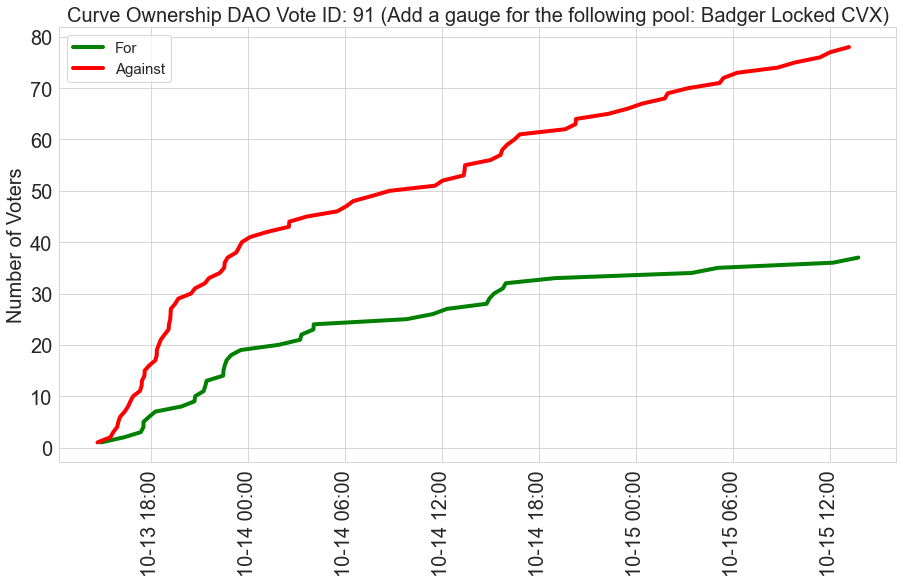

In [97]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.plot(for_proposal.index, for_proposal.choice.cumsum(), 'g', lw=4, label="For")
ax.plot(against_proposal.index, against_proposal.choice.cumsum(), 'r', lw=4, label="Against")

ax.set_ylabel("Number of Voters", fontsize=20)
ax.set_title(
    f"Curve Ownership DAO Vote ID: 91 (Add a gauge for the following pool: Badger Locked CVX)", fontsize=20
)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
_ = plt.xticks(rotation=90)

ax.legend(fontsize=15);